# APRENDIZAJE NO SUPERVISADO - Algoritmo DBSCAN

Para mostrar las bondades de este algoritmo, empleemos un ejemplo con datos del paquete **factoextra**.    

Estos datos tienen una distribución no lineal que permite entender mejor las bondades de DBSCAN.    

Se cargan los datos en el objeto **multishapes** usando solo las dos primeras variables. Estos datos ya están estandarizados.

In [ ]:
install.packages("parameters")

Installing package into ‘/home/jordi/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)


probando la URL 'https://cloud.r-project.org/src/contrib/NbClust_3.0.1.tar.gz'
Content type 'application/x-gzip' length 22094 bytes (21 KB)
downloaded 21 KB

* installing *source* package ‘NbClust’ ...
** this is package ‘NbClust’ version ‘3.0.1’
** package ‘NbClust’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (NbClust)

The downloaded source packages are in
	‘/tmp/RtmpXB93sc/downloaded_packages’


In [7]:
# Cargar el paquete
library(factoextra)
library(dbscan)
library(parameters)
# Cargar los datos
data("multishapes")
# Seleccionar las dos primeras variables
multishapes <- multishapes[, 1:2]

In [8]:
multishapes

                x            y
1   -0.8037392649 -0.853052609
2    0.8528507281  0.367618437
3    0.9271795061 -0.274902438
4   -0.7526260566 -0.511565170
5    0.7068462243  0.810679197
6    1.0346985223  0.394655023
7   -0.4758451977  0.989760805
8   -0.4603015670 -0.858997793
9   -0.6803015450 -0.661494813
10  -1.0319692999 -0.021993545
11  -0.2424983722 -1.050332756
12  -0.8922583643 -0.339169233
13  -0.8020344035 -0.774167767
14  -0.0471955691 -1.016137986
15   1.1947042666 -0.269002461
16  -0.2214873902 -0.919131896
17  -0.4104753200  0.964479005
18  -0.8389352702 -0.407979035
19  -0.8891475108  0.614016108
20   0.9055641273  0.184568397
21  -0.0057948516 -0.884430709
22  -0.7038103950  0.547492492
23  -1.0708157062 -0.158982747
24   1.0072376188  0.385175352
25  -0.5848615893  0.700117706
26  -0.8811401526 -0.011888759
27   0.3269950430  0.998908556
28  -1.0476211377  0.118543573
29  -0.1199604895 -1.035410727
30  -0.7855329357  0.713418469
31   0.6462687840 -0.643552161
32  -0.2

#### Visualización de los datos


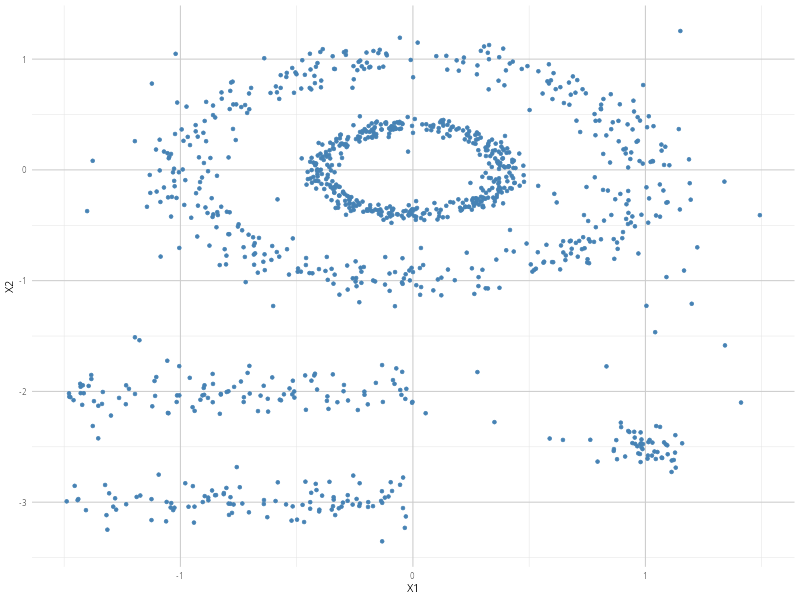

In [9]:
library(ggplot2)

df <- as.data.frame(multishapes) # Convertir a data frame
colnames(df) <- c("X1", "X2") # Renombrar columnas

ggplot(df, aes(x = X1, y = X2)) +
  geom_point(color = "steelblue", size = 1.5) +
  theme_minimal() +
  theme(
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90")
  )
  labs(title = "Dataset multishapes", x = "X1", y = "X2")


Para poder comparar los resultados de DBSCAN, usaremos primero el algoritmo **k-means**.    
Es probable que, empleando la distancia euclidiana y el criterio de la silueta, el número óptimo de clústeres sea 2 (se propone como tarea de investigación al alumno).    

Los datos y sus respectivas asignaciones se observan en el siguiente gráfico. Con el algoritmo k-means encontramos 2 clústeres.

In [10]:
kmeans_model <- kmeans(multishapes, centers = 2, nstart = 20) # Ajuste del modelo, con 20 inicializaciones aleatorias y sin la columna de especies
kmeans_model

K-means clustering with 2 clusters of sizes 831, 269

Cluster means:
             x          y
1  0.006220719 -0.0288532
2 -0.351350570 -2.4683919

Clustering vector:
   [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 1 1 1 1 

### Visualización de los datos con **k-means**


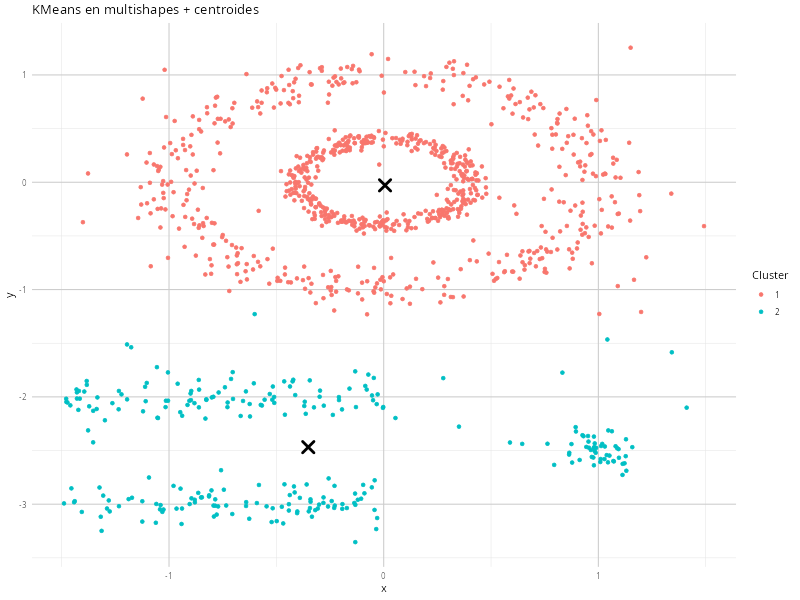

In [11]:
library(ggplot2)

df <- as.data.frame(multishapes)
colnames(df)[1:2] <- c("x", "y") 
df$cluster <- factor(kmeans_model$cluster)

cent <- as.data.frame(kmeans_model$centers)
colnames(cent)[1:2] <- c("x", "y")

ggplot(df, aes(x = x, y = y, color = cluster)) +
  geom_point(size = 1.5) +
  geom_point(data = cent, aes(x = x, y = y),
             inherit.aes = FALSE,
             color = "black",
             size = 4, shape = 4, stroke = 2) +
  theme_minimal() +
  theme(
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90")
  ) +
  labs(title = "KMeans en multishapes + centroides", color = "Cluster")

Ahora empleemos el algoritmo **DBSCAN**. Primero optimicemos el parámetro *eps*.

In [12]:
res_eje2_dbscan <- n_clusters_dbscan(multishapes, 
                                standardize = FALSE,
                                eps_range = c(0.001, 3),
                                distance_method = "euclidean",
                                min_size = 5,
                                method = "SS")

In [13]:
res_eje2_dbscan

The DBSCAN method, based on the total clusters sum of squares, suggests that the optimal eps = 0.123408163265306 (with min. cluster size set to ), which corresponds to 7 clusters.

El valor óptimo de eps es 0.1234082 lo que implicará 7 clústeres.   

### Por qué eso implica 7 clústeres

DBSCAN no “elige” el número de clústeres como k-means. El número de clústeres resulta automáticamente de la densidad detectada.

Cuando se fija `eps = 0.1234082`:

- se crean conexiones entre puntos que están a ≤ 0.1234 de distancia

- se forman componentes conectadas densas

- cada componente densa es un clúster

✅ En el dataset, con ese radio existen *7 zonas densas* separadas entre sí (más una zona de *"ruido"*) → DBSCAN detecta 7 clústeres.

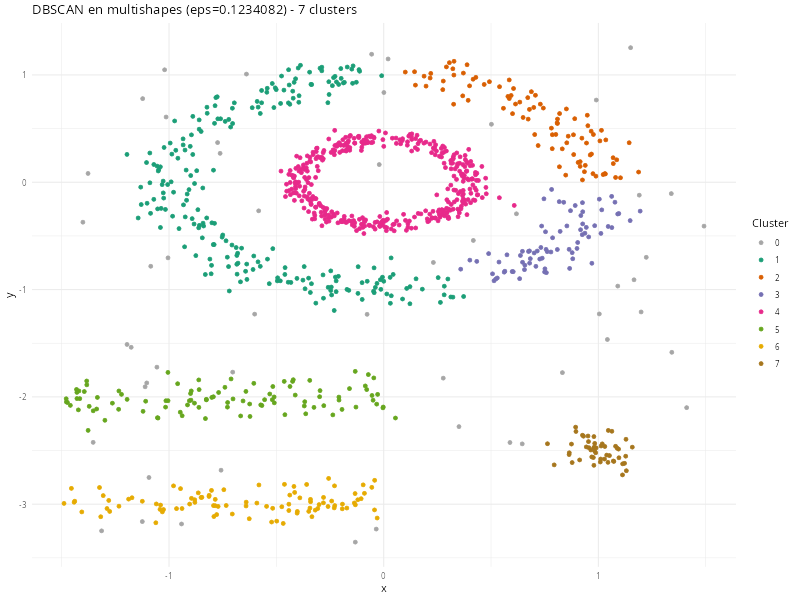

In [14]:
eps_opt <- 0.1234082
db <- dbscan(multishapes, eps = eps_opt, minPts = 5)

df <- as.data.frame(multishapes)
colnames(df)[1:2] <- c("x", "y")
df$cluster <- factor(db$cluster)   # 0 = ruido

ggplot(df, aes(x = x, y = y)) +
  geom_point(aes(color = cluster), size = 1.6) +
  scale_color_manual(
    values = c(
      "0" = "gray65",   # ruido
      "1" = "#1b9e77",
      "2" = "#d95f02",
      "3" = "#7570b3",
      "4" = "#e7298a",
      "5" = "#66a61e",
      "6" = "#e6ab02",
      "7" = "#a6761d"
    )
  ) +
  theme_minimal() +
  
  labs(
    title = paste0("DBSCAN en multishapes (eps=", eps_opt, ") - 7 clusters"),
    color = "Cluster"
  )


Observando los resultados, parece ser mucho mejor emplear DBSCAN que el algoritmo *k-means* para generar la partición de los datos. 